In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate,integrate
from mgefit.mge_fit_1d import mge_fit_1d
import pandas as pd
import pickle
from scipy.stats import reciprocal
import emcee
import scipy.special as special



In [3]:
def theta2rho(theta_E, gamma):
    """
    converts projected density parameter (in units of deflection) into 3d density parameter

    :param theta_E:
    :param gamma:
    :return:
    """
    fac1 = np.sqrt(np.pi) * special.gamma(1. / 2 * (-1 + gamma)) / special.gamma(gamma / 2.) * 2 / (3 - gamma)
    fac2 = theta_E**(gamma - 1)
    rho0 = fac2 / fac1
    return rho0


kappa_func_mst =  lambda r,gamma,lambda_mst,theta_E,R_core : lambda_mst*theta2rho(theta_E,gamma) / r**gamma +  (1-lambda_mst) * (2/np.pi)*R_core**2/((R_core**2+r**2)**(3/2))    

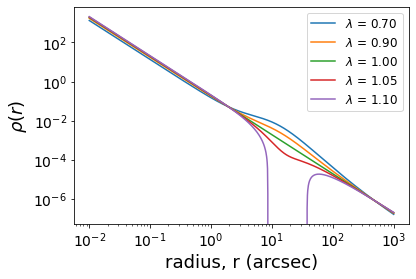

In [7]:
gamma = 2.0
theta_E =  1.2 #arcsec
lambda_mst_fixed = 0.9 #arcsec
R_core_fixed = 12 #arcsec

xdata=np.logspace(-2,3,1000)

for i,lambda_mst in enumerate([0.70,0.90,1.00,1.05,1.10]):
    plt.plot(xdata,kappa_func_mst(xdata,gamma,lambda_mst,theta_E,R_core_fixed),label='$\\lambda$ = {:.2f}'.format(lambda_mst))

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14,);
plt.yticks(fontsize=14,);
plt.xlabel('radius, r (arcsec)',fontsize=18)
plt.ylabel(r'$\rho(r)$',fontsize=18)
plt.legend(fontsize=12)
plt.show()

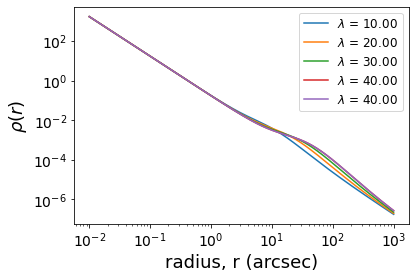

In [10]:
gamma = 2.0
theta_E =  1.2 #arcsec
lambda_mst_fixed = 0.9 #arcsec
R_core_fixed = 12 #arcsec

xdata=np.logspace(-2,3,1000)

for i,R_core in enumerate([10,20,30,40,40]):
    plt.plot(xdata,kappa_func_mst(xdata,gamma,lambda_mst_fixed,theta_E,R_core),label='$\\lambda$ = {:.2f}'.format(R_core))

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=14,);
plt.yticks(fontsize=14,);
plt.xlabel('radius, r (arcsec)',fontsize=18)
pl
plt.ylabel(r'$\rho(r)$',fontsize=18)
plt.legend(fontsize=12)
plt.show()